In [1]:
from qTools import *

import matplotlib.pyplot as plt

In [2]:
qubit = Qubit(frequency=1)

qubit.initialState = {0:0.5, 1:0.5}
#qubit.initialState = [0, 1]

In [3]:
print(qubit.totalHam.A)
print(qubit.initialState.A)

[[ 0.5  0. ]
 [ 0.  -0.5]]
[[0.70710678]
 [0.70710678]]


In [4]:
def compute(sim, state):
    # Fidelity to intial
    sim.results['fidelity'].append(fidelityKet(state, qubit.initialState))

    # Bloch Sphere coordinates
    sim.results['x'].append(expectationKet(sigmax(), state))
    sim.results['y'].append(expectationKet(sigmay(), state))
    sim.results['z'].append(expectationKet(sigmaz(), state))

qubit.simulation.compute = compute

In [5]:
qubit.simulation.totalTime = 1
qubit.simulation.stepSize = 0.01
qubit.simulation.delStates = True

In [6]:
qubit.simulation.run()

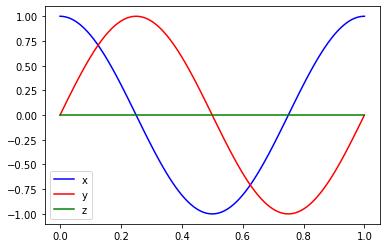

In [7]:
def plot(index = None, lineCS = ['b', 'r', 'g']):
    if index is None:
        x = qubit.simulation.qRes.results['x']
        y = qubit.simulation.qRes.results['y']
        z = qubit.simulation.qRes.results['z']
    elif isinstance(index, int):
        x = qubit.simulation.qRes.results['x'][index]
        y = qubit.simulation.qRes.results['y'][index]
        z = qubit.simulation.qRes.results['z'][index]

    t = qubit.simulation.timeList

    plt.plot(t, x, lineCS[0])
    plt.plot(t, y, lineCS[1])
    plt.plot(t, z, lineCS[2])
    plt.legend(['x', 'y', 'z'])

plot()

In [8]:
freqSweep = qubit.simulation.Sweep.createSweep(sweepKey='frequency', sweepList = [1, 2])

qubit.simulation.run()

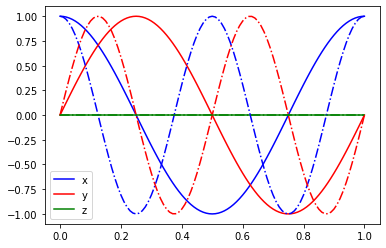

In [9]:
plot(index=0)
plot(index=1, lineCS=['b-.', 'r-.', 'g-.'])

In [10]:
qubit.operator = sigmax
qubit.frequency = 1

qubit.simulation.run()

In [11]:
print(qubit.frequency)
print(qubit.totalHam.A)
print(qubit.initialState.A)

2
[[0. 1.]
 [1. 0.]]
[[0.70710678]
 [0.70710678]]


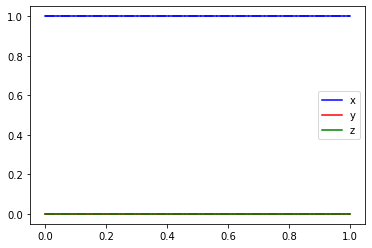

In [12]:
plot(index=0)
plot(index=1, lineCS=['b-.', 'r-.', 'g-.'])

In [13]:
sy = qubit.addTerm(sigmay, 1)

qubit.simulation.run()

In [14]:
print(qubit.totalHam.A)
print(qubit.initialState.A)

[[0.+0.j  1.-0.5j]
 [1.+0.5j 0.+0.j ]]
[[0.70710678]
 [0.70710678]]


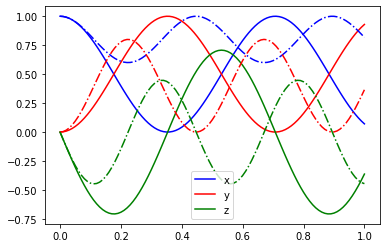

In [15]:
plot(index=0)
plot(index=1, lineCS=['b-.', 'r-.', 'g-.'])

In [16]:
sy.order = 2

qubit.simulation.run()

In [17]:
print(qubit.totalHam.A)
print(qubit.initialState.A)

[[0.5+0.j 1. +0.j]
 [1. +0.j 0.5+0.j]]
[[0.70710678]
 [0.70710678]]


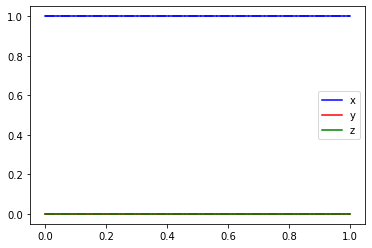

In [18]:
plot(index=0)
plot(index=1, lineCS=['b-.', 'r-.', 'g-.'])

In [19]:
qubit.removeSubSys(sy)

qubit.operator = sigmaz

qubit.initialState = 0

Qubit2 is removed from subSys of Qubit1


In [20]:
print(qubit.totalHam.A)
print(qubit.initialState.A)

[[ 1.  0.]
 [ 0. -1.]]
[[1]
 [0]]


In [21]:
qubit.simulation.run()

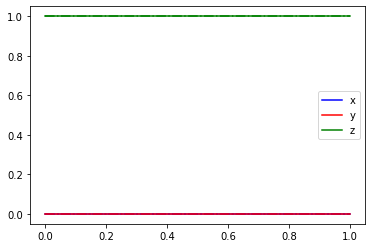

In [22]:
plot(index=0)
plot(index=1, lineCS=['b-.', 'r-.', 'g-.'])

In [23]:
driveFreq = 1

driveTerm1 = qubit.addTerm(sigmam, driveFreq)
driveTerm2 = qubit.addTerm(sigmap, driveFreq)

In [24]:
print(qubit.totalHam.A)
print(qubit.initialState.A)

[[ 1.   0.5]
 [ 0.5 -1. ]]
[[1]
 [0]]


In [25]:
qubit.simulation.run()

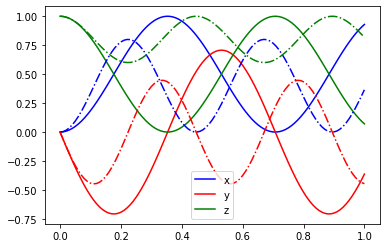

In [26]:
plot(index=0)
plot(index=1, lineCS=['b-.', 'r-.', 'g-.'])